In [1]:
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [4]:
# Load a pre-trained ResNet model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# Define the target layer for visualization
target_layers = [model.layer4]
target_layers

[Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (downsample): Sequential(
       (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (1): BasicBlock(
     (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): Batc

In [6]:
# Image preprocessing
transform = transforms.Compose([
    transforms.ToTensor()
])

In [7]:
# Load and preprocess the image
image_path = './1.png'
rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]

In [8]:
scale = 0.2
width = int(rgb_img.shape[1] * scale)
height = int(rgb_img.shape[0] * scale)
rgb_img = cv2.resize(rgb_img, (width, height), interpolation=cv2.INTER_AREA)

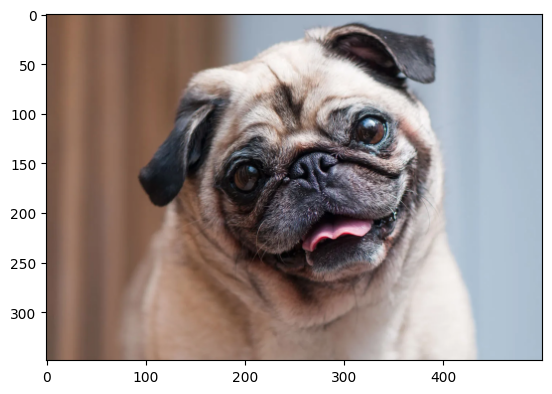

In [9]:
plt.imshow(rgb_img)

In [10]:
rgb_img = np.float32(rgb_img) / 255
input_tensor = transform(rgb_img).unsqueeze(0)

In [11]:
# https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
# targets = [ClassifierOutputTarget(254)] # pug
targets = [ClassifierOutputTarget(1)]

In [12]:
cam = GradCAM(model=model, target_layers=target_layers)

In [13]:
grayscale_cam = cam(
    input_tensor=input_tensor,
    targets=targets,
    aug_smooth=True,
    eigen_smooth=True
)[0, :]

In [14]:
grayscale_cam

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(349, 500), dtype=float32)

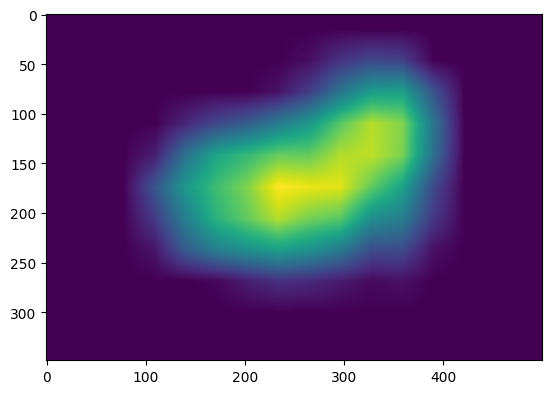

In [15]:
plt.imshow(grayscale_cam)

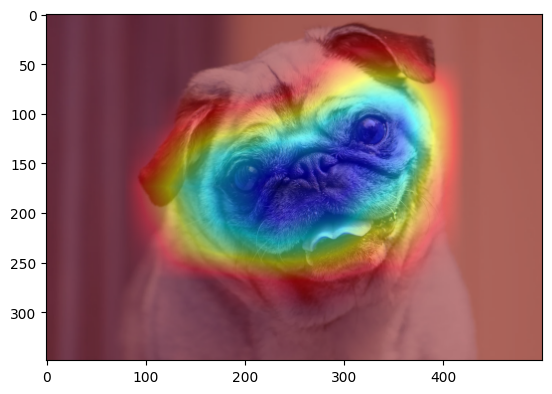

In [16]:
cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
cam_image = cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)
plt.imshow(cam_image)